## Working Directory: F:\AIS\Enquiries and Pricing\Enquiries Log - 2022

## Delete the new files to avoid duplications:

In [1]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import os

In [2]:
# Delete the new files to avoid duplications:
os.remove(r'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx')
os.remove(r'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Forms Charts.xlsx')

## Create an empty workbook & rename sheet

In [3]:
from openpyxl import Workbook
from openpyxl.styles import Font
wb = Workbook()

In [4]:
ws = wb.active

In [5]:
ws = wb.create_sheet("Log Forms Dashboard") # insert at the end (default)
ws.sheet_view.showGridLines = False

In [6]:
ws1 = wb.create_sheet("NLP", 0) # insert at first position
ws1.sheet_view.showGridLines = False

In [7]:
ws.sheet_properties.tabColor = "1072BA"
ws1.sheet_properties.tabColor = "1072BA"

In [8]:
std = wb.get_sheet_by_name('Sheet')

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\3791390264.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  std = wb.get_sheet_by_name('Sheet')


In [9]:
wb.remove_sheet(std)

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\2605078882.py:1: DeprecationWarning: Call to deprecated function remove_sheet (Use wb.remove(worksheet) or del wb[sheetname]).
  wb.remove_sheet(std)


In [10]:
# Loop trought the file to check the sheets:
for sheet in wb:
     print(sheet.title)

NLP
Log Forms Dashboard


In [11]:
ws = wb['NLP']
ws['A2'] = 'NLP for Received/ purchased reports for Yes or No provided solutions:'
font = Font(size=30)
ws['A2'].font = font

In [12]:
ws = wb['NLP']
ws['A28'] = 'NLP for Received/ purchased reports for Non provided solutions:'
font = Font(size=30)
ws['A28'].font = font

In [13]:
ws = wb['Log Forms Dashboard']
ws['A1'] = 'Log Forms Dashboard'
font = Font(size=30)
ws['A1'].font = font

In [14]:
wb.save("F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx")

In [15]:
## The syntax to close an excel file in openpyxl is very simple i.e
wb.close()

## Load the DashBoard file

In [16]:
import xlwings as xl
path = r'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\'
wb = xl.Book(path+'Forms Charts.xlsx')
app = xl.apps.active
sht = wb.sheets['Log Forms Dashboard']
sht1 = wb.sheets['NLP']

## Load the Form Dataset

In [17]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import pandas as pd

# Load the data
df = pd.read_excel (f'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\SDI Logs and Enquiries Form.xlsx', 'Enquiry Sheet')

C:\Users\alvesd\AppData\Local\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [18]:
# Replace each occurrence of pattern/regex in the Series/Index.
df['Question/ requests (Free text)'] = df['Question/ requests (Free text)'].str.replace('\W', ' ', regex=True)
df['DataSet'] = df['DataSet'].astype(str) # or str for string
df['Date'] = df['Date'].astype(str) # or str for string

# Number of enquiries per type of enquiry:

In [19]:
# Return a Series containing counts of unique values.
df['Enquiry type'].value_counts(ascending=False)#[:10]

General enquiry     96
Data                95
DataShop            11
Internal enquiry     5
MVRIS                2
General Enquiry      1
Name: Enquiry type, dtype: int64

In [20]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import seaborn as sns
# Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set_theme(style="whitegrid")

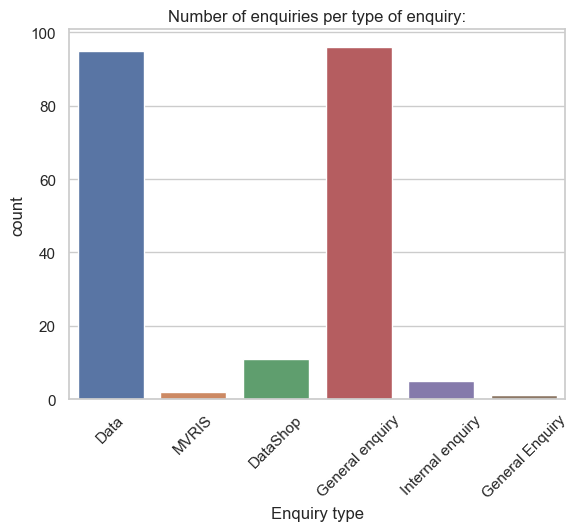

In [21]:
# Show the counts of observations in each categorical bin using bars.
#sns.countplot(x=df["Enquiry type"])
sns_hist = sns.countplot(x=df["Enquiry type"])
sns_hist.set_xticklabels(sns_hist.get_xticklabels(), rotation=45)
sns_hist.set(title='Number of enquiries per type of enquiry:')
fig = sns_hist.get_figure()

## Insert Chart Into Excel

In [22]:
sht.pictures.add(
fig, 
name="Matploitlib", 
left = sht.range("B5").left,
top = sht.range("B5").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

# Number of enquiries per product type:

In [23]:
# Return a Series containing counts of unique values.
df['DataSet'].value_counts(ascending=False)#[:10]

nan                 90
New Reg - Car       34
Combination         28
Parc                18
AFV                 14
New Regs - HCV      13
Used                 8
General enquiry      7
New Reg - LCV        4
Production - Car     2
Name: DataSet, dtype: int64

In [24]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import seaborn as sns
# Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set_theme(style="whitegrid")

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\3313928251.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_hist1.set_xticklabels(sns_hist1.get_xticklabels(), rotation=45)


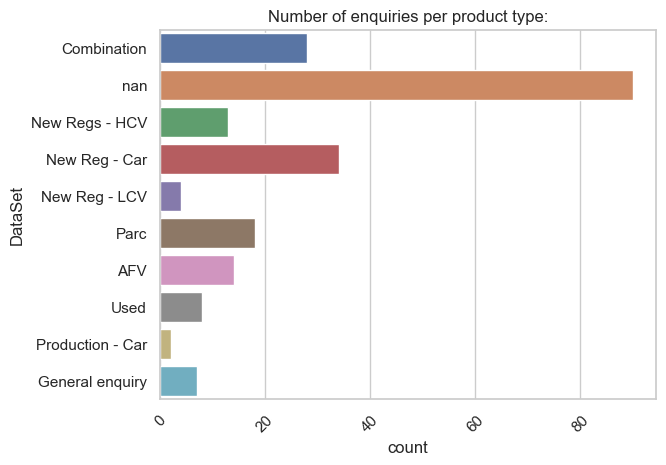

In [25]:
# Show the counts of observations in each categorical bin using bars.
sns_hist1 = sns.countplot(y=df["DataSet"])
sns_hist1.set_xticklabels(sns_hist1.get_xticklabels(), rotation=45)
sns_hist1.set(title='Number of enquiries per product type:')
fig = sns_hist1.get_figure()

## Insert Chart Into Excel

In [26]:
sht.pictures.add(
fig, 
name="Matploitlib1", 
left = sht.range("O5").left,
top = sht.range("O5").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib1' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

# 1. Enquiries dealt with vs unable to deal with Products & Services: Data available to help?
## Column: Solution type

In [27]:
# Return a Series containing counts of unique values.
df['Solution type'].value_counts(ascending=False)#[:10]

DataShop email              81
Solution provided           74
No Solution                 12
Manual Quote                 4
General enquiry              3
Provided data (internal)     2
Name: Solution type, dtype: int64

In [28]:
# Return a Series containing counts of unique values.
import seaborn as sns
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style="whitegrid")

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\1855412304.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_hist2.set_xticklabels(sns_hist2.get_xticklabels())


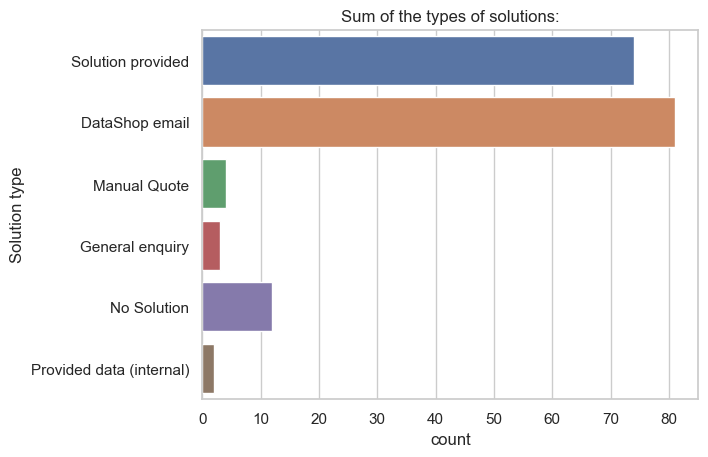

In [29]:
# Show the counts of observations in each categorical bin using bars.
sns_hist2 = sns.countplot(y=df["Solution type"]) #.set(title='Sum of the types of solutions:')
sns_hist2.set_xticklabels(sns_hist2.get_xticklabels())
sns_hist2.set(title='Sum of the types of solutions:')
fig = sns_hist2.get_figure()

## Insert Chart Into Excel

In [30]:
sht.pictures.add(
fig, 
name="Matploitlib2", 
left = sht.range("B38").left,
top = sht.range("B38").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib2' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

# 2. Enquiries dealt with vs unable to deal with Products & Services: Data available to help?
## Colunm: Data avaliable to help?

In [31]:
# Return a Series containing counts of unique values.
df['Data avaliable to help?'].value_counts(ascending=False)#[:10]

Yes       138
No         28
Partly     17
Name: Data avaliable to help?, dtype: int64

In [32]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import seaborn as sns
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style="whitegrid")

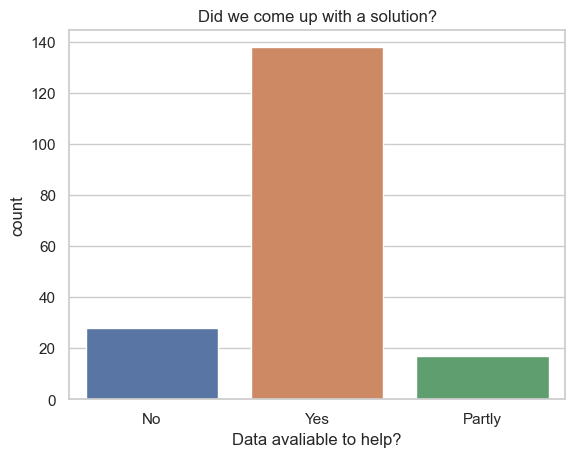

In [33]:
# Show the counts of observations in each categorical bin using bars. 
sns_hist3 = sns.countplot(x=df["Data avaliable to help?"]) #.set(title='Did we come up with a solution?')
sns_hist3.set_xticklabels(sns_hist3.get_xticklabels())
sns_hist3.set(title='Did we come up with a solution?')
fig = sns_hist3.get_figure()

## Insert Chart Into Excel

In [34]:
sht.pictures.add(
fig, 
name="Matploitlib3", 
left = sht.range("O38").left,
top = sht.range("O38").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib3' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

## Next: Find out what was missed?

# 3. Enquiries dealt with vs unable to deal with Products & Services: Data available to help?
## Column: Data in DataShop? 

In [35]:
# Convert the first letter to Capital letter
df['Data in DataShop?'] =df['Data in DataShop?'].str.title()

In [36]:
# Return a Series containing counts of unique values.
df['Data in DataShop?'].value_counts(ascending=False)#[:10]

Yes       94
No        46
Partly    27
Name: Data in DataShop?, dtype: int64

In [37]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import seaborn as sns
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style="whitegrid")

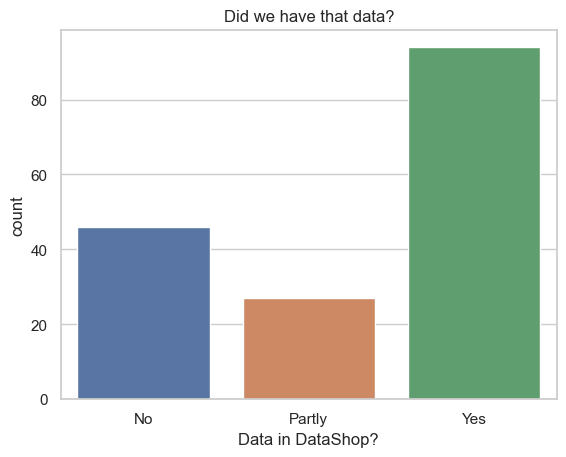

In [38]:
# Show the counts of observations in each categorical bin using bars. 
sns_hist4 = sns.countplot(x=df["Data in DataShop?"])#.set(title='Did we have that data?')
sns_hist4.set_xticklabels(sns_hist4.get_xticklabels())
sns_hist4.set(title='Did we have that data?')
fig = sns_hist4.get_figure()

## Insert Chart Into Excel

In [39]:
sht.pictures.add(
fig, 
name="Matploitlib4", 
left = sht.range("B71").left,
top = sht.range("B71").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib4' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

# Number of enquiries based on the emails:
## Column: Email address

In [40]:
# Return a Series containing counts of unique values.
email = df['Email address'].value_counts(ascending=False)#[:10]
print(email)

ross.nagle@allianz.co.uk                5
charles.eardley@element-energy.co.uk    5
ccd33@cam.ac.uk                         3
schoongh@smmt.co.uk                     3
ellen.riis-white@carwow.co.uk           3
                                       ..
chris.waller@pluralinvesting.com        1
Kyoko.ida@mitshubishi-hc-capital.com    1
damien@van-guard.co.uk                  1
tunye.qiu@anu.edu.au                    1
info@hekwindscreens.co.uk               1
Name: Email address, Length: 183, dtype: int64


In [41]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import seaborn as sns
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style="whitegrid")

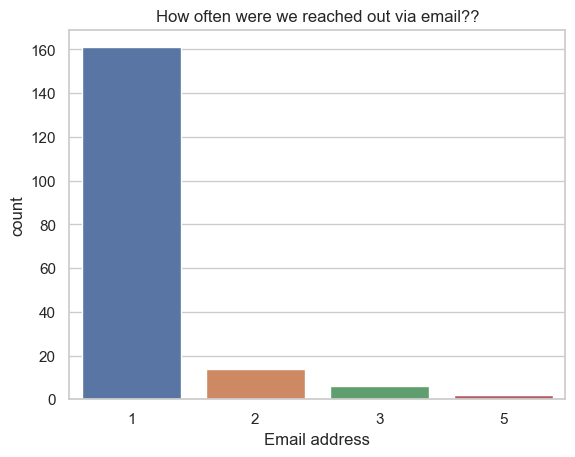

In [42]:
# Show the counts of observations in each categorical bin using bars. 
sns_hist5 = sns.countplot(x=email) #.set(title='How often were we reached out via email?')
sns_hist5.set_xticklabels(sns_hist5.get_xticklabels())
sns_hist5.set(title='How often were we reached out via email??')
fig = sns_hist5.get_figure()

## Insert Chart Into Excel

In [43]:
sht.pictures.add(
fig, 
name="Matploitlib5", 
left = sht.range("O71").left,
top = sht.range("O71").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib5' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

## Column: Received/ purchased reports

In [44]:
# Replace a single value with a new value for an individual DataFrame column:
df['Received/ purchased reports'] = df['Received/ purchased reports'].replace(['Datashop'], 'DataShop')
df['Received/ purchased reports'] = df['Received/ purchased reports'].replace(['Y'], 'Yes')

In [45]:
# Return a Series containing counts of unique values.
reports = df['Received/ purchased reports'].value_counts(ascending=False)#[:10]
print(reports)

No          97
DataShop    30
Manual      11
Yes          2
Name: Received/ purchased reports, dtype: int64


In [46]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import seaborn as sns
# Show the counts of observations in each categorical bin using bars.
sns.set_theme(style="whitegrid")

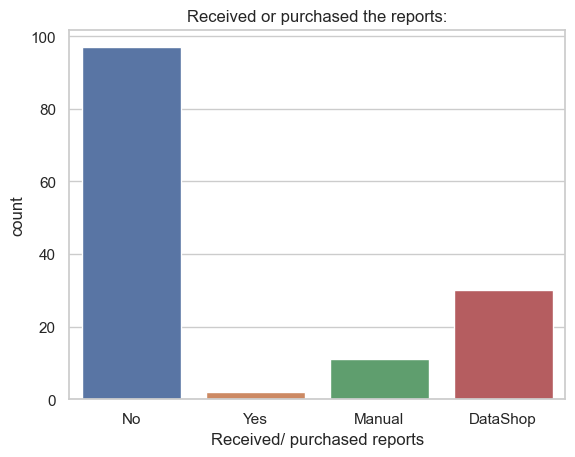

In [47]:
# Show the counts of observations in each categorical bin using bars. 
sns_hist6 = sns.countplot(x=df['Received/ purchased reports'])#.set(title='Received or purchased the reports:')
sns_hist6.set_xticklabels(sns_hist6.get_xticklabels())
sns_hist6.set(title='Received or purchased the reports:')
fig = sns_hist6.get_figure()

## Insert Chart Into Excel

In [48]:
sht.pictures.add(
fig, 
name="Matploitlib6", 
left = sht.range("B106").left,
top = sht.range("B106").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib6' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

## Next, why? 

## Top 20 of number of enquiries per type of Email address vs. SDI contact date:

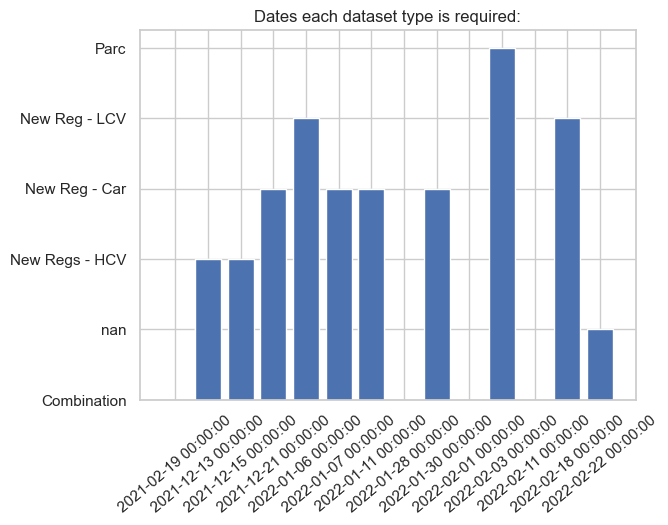

In [49]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
# Pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:
import matplotlib.pyplot as plt
fig = plt.figure()
df1 = df.head(20)
y = df1['DataSet']
x = df1['Date']
# Show the plot:
plt.bar(x,y)
plt.xticks(rotation=40)
plt.title("Dates each dataset type is required:")
plt.show()

## Insert Chart Into Excel

In [50]:
sht.pictures.add(
fig, 
name="Matploitlib7", 
left = sht.range("O106").left,
top = sht.range("O106").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib7' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

## What new product and services we can bring to our customers?

## This is based on requests made in the discussion of the problem log. Based on what they’ve asked vs what we have available

## Including, offering new services to our clients. Systems & user issues

## Finally, use the repetitive errors brought up by our customers as a reference to improve our services.

## Most common words in the "Question/ requests (Free text)" column from Yes and NO answers:

In [51]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import re

In [52]:
text = df['Question/ requests (Free text)']

In [53]:
# Clean text by removing special characters:
text = re.sub(r'==.*?==+', '', str(text))
text = text.replace('\n', '')

In [54]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import matplotlib.pyplot as plt

In [55]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [56]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
#plot_cloud(wordcloud)

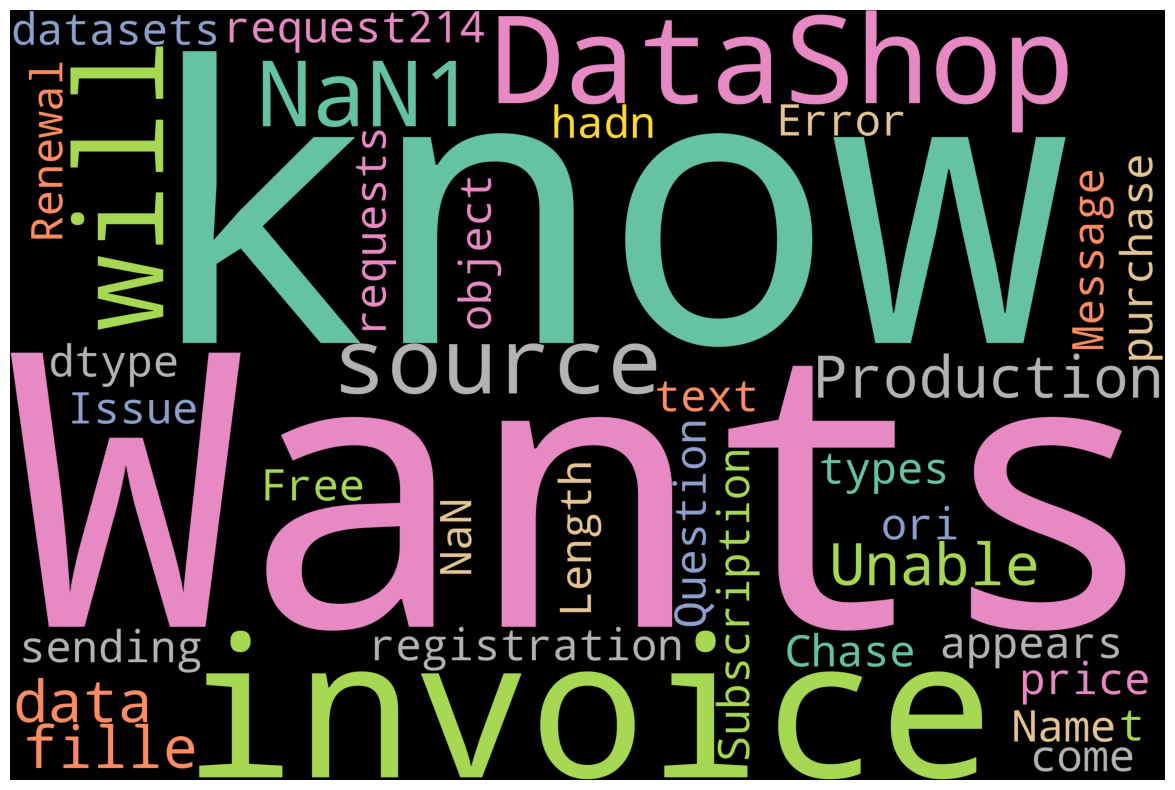

In [57]:
# Generate wordcloud splits a long text into words, eliminates the stopwords. recolor ([random_state, color_func, colormap])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Save to a file
wordcloud.to_file('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_Yes_No_Solution.png')
# Plot
word1 = plot_cloud(wordcloud)

## Most common words in the "Received/ purchased reports" column from No answers:

In [58]:
# Require that many non-NA values. Cannot be combined with how. subsetcolumn label or sequence of labels
df1 = df.dropna(subset=['Received/ purchased reports'])

In [59]:
# Romove the yes answers:
df1[(df['Received/ purchased reports'] == 'No')] # & (df['Received/ purchased reports'] != 'Y')

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\3744891021.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[(df['Received/ purchased reports'] == 'No')] # & (df['Received/ purchased reports'] != 'Y')


,Email address,Full name,Company/ Department,Date,Contact Method,SDI Contact responsible,Enquiry type,Question/ requests (Free text),Solution type,Solution (Free text),SDI contact date,DataSet,Data avaliable to help?,Data in DataShop?,Datashop account created,Received/ purchased reports,Purchase price,Who will receive data
2,Tricia.Stones@simonbailes.co.uk,Tricia Stones,Simon Bailes,2021-12-13 00:00:00,Email,NaN,MVRIS,29 12 21 Unable to fille out registration for...,Solution provided,4.1.22 JT asked which borwser and to spply scr...,2021-12-13 00:00:00,nan,NaN,NaN,No,No,NaN,NaN
8,gorin@arrival.com,Ed Gorin,Arrival,2022-01-06 00:00:00,Email,NaN,Data,requested to get registration data for vans wi...,DataShop email,NaN,2022-01-06 00:00:00,New Reg - LCV,Yes,Yes,Yes,No,NaN,NaN
9,simon.gallagher@esmartnetworks.co.uk,Simon Gallagher,eSmart Networks Limited,2022-01-07 00:00:00,Email,NaN,Data,request to purchase vehichle data from 2005,NaN,NaN,NaN,Combination,Yes,Yes,No,No,NaN,NaN
10,clare.smith@estartruckandvan.co.uk,Clare Smith,Mercedes- Benz Truck & Van,2022-01-07 00:00:00,Email,NaN,Data,Request for Market Share Registrations,NaN,NaN,2022-01-11 00:00:00,New Reg - Car,Yes,Partly,Yes,No,NaN,NaN
11,joe.o'mahony@applegreenelectric.com>,Joe Mahony,EV Ireland,2022-01-11 00:00:00,Email,NaN,Data,Request for monthly data with Northern Ireland...,NaN,NaN,2022-01-11 00:00:00,New Reg - Car,Yes,Yes,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,nlowe@smmt.co.uk,Nick Lowe,SMMT,2023-03-01 00:00:00,Email,James,General enquiry,Requested for data for N1 commercials vehicles...,Solution provided,No,2023-03-03 00:00:00,nan,No,No,No,No,NaN,SMMT
206,Georgina.Smith@justgo.uk.com,Georgina Smith,Just Go,2023-03-03 00:00:00,Email,NaN,General enquiry,Need to populate cells on spreadsheet for mode...,NaN,NaN,NaN,nan,NaN,No,No,No,NaN,Just Go
209,Jojo.Tam@Jardinemotors.co.uk,JoJo Tam,Jardine Motors Group,2023-03-07 00:00:00,Email,Sugam,General enquiry,For new car registrations report wants to add...,Solution provided,No,2023-03-08 00:00:00,nan,Yes,No,Yes,No,NaN,Jardine Motors Group
212,placekmart@gmail.com,Martin Placek,Statista,2023-03-08 00:00:00,Email,NaN,General enquiry,Requested to know when UK Automotive Trade Rep...,NaN,NaN,NaN,nan,NaN,No,No,No,NaN,Statista


In [60]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import wikipedia
import re

In [61]:
# Select the column Question/ requests (Free text) to be analysed:
text1 = df1['Question/ requests (Free text)']

In [62]:
# Clean text by removing all special characters from rows: 
text1 = re.sub(r'==.*?==+', '', str(text1))
text1 = text1.replace('\n', '')

In [63]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import matplotlib.pyplot as plt

In [64]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [65]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text1)
# Plot
#plot_cloud(wordcloud)

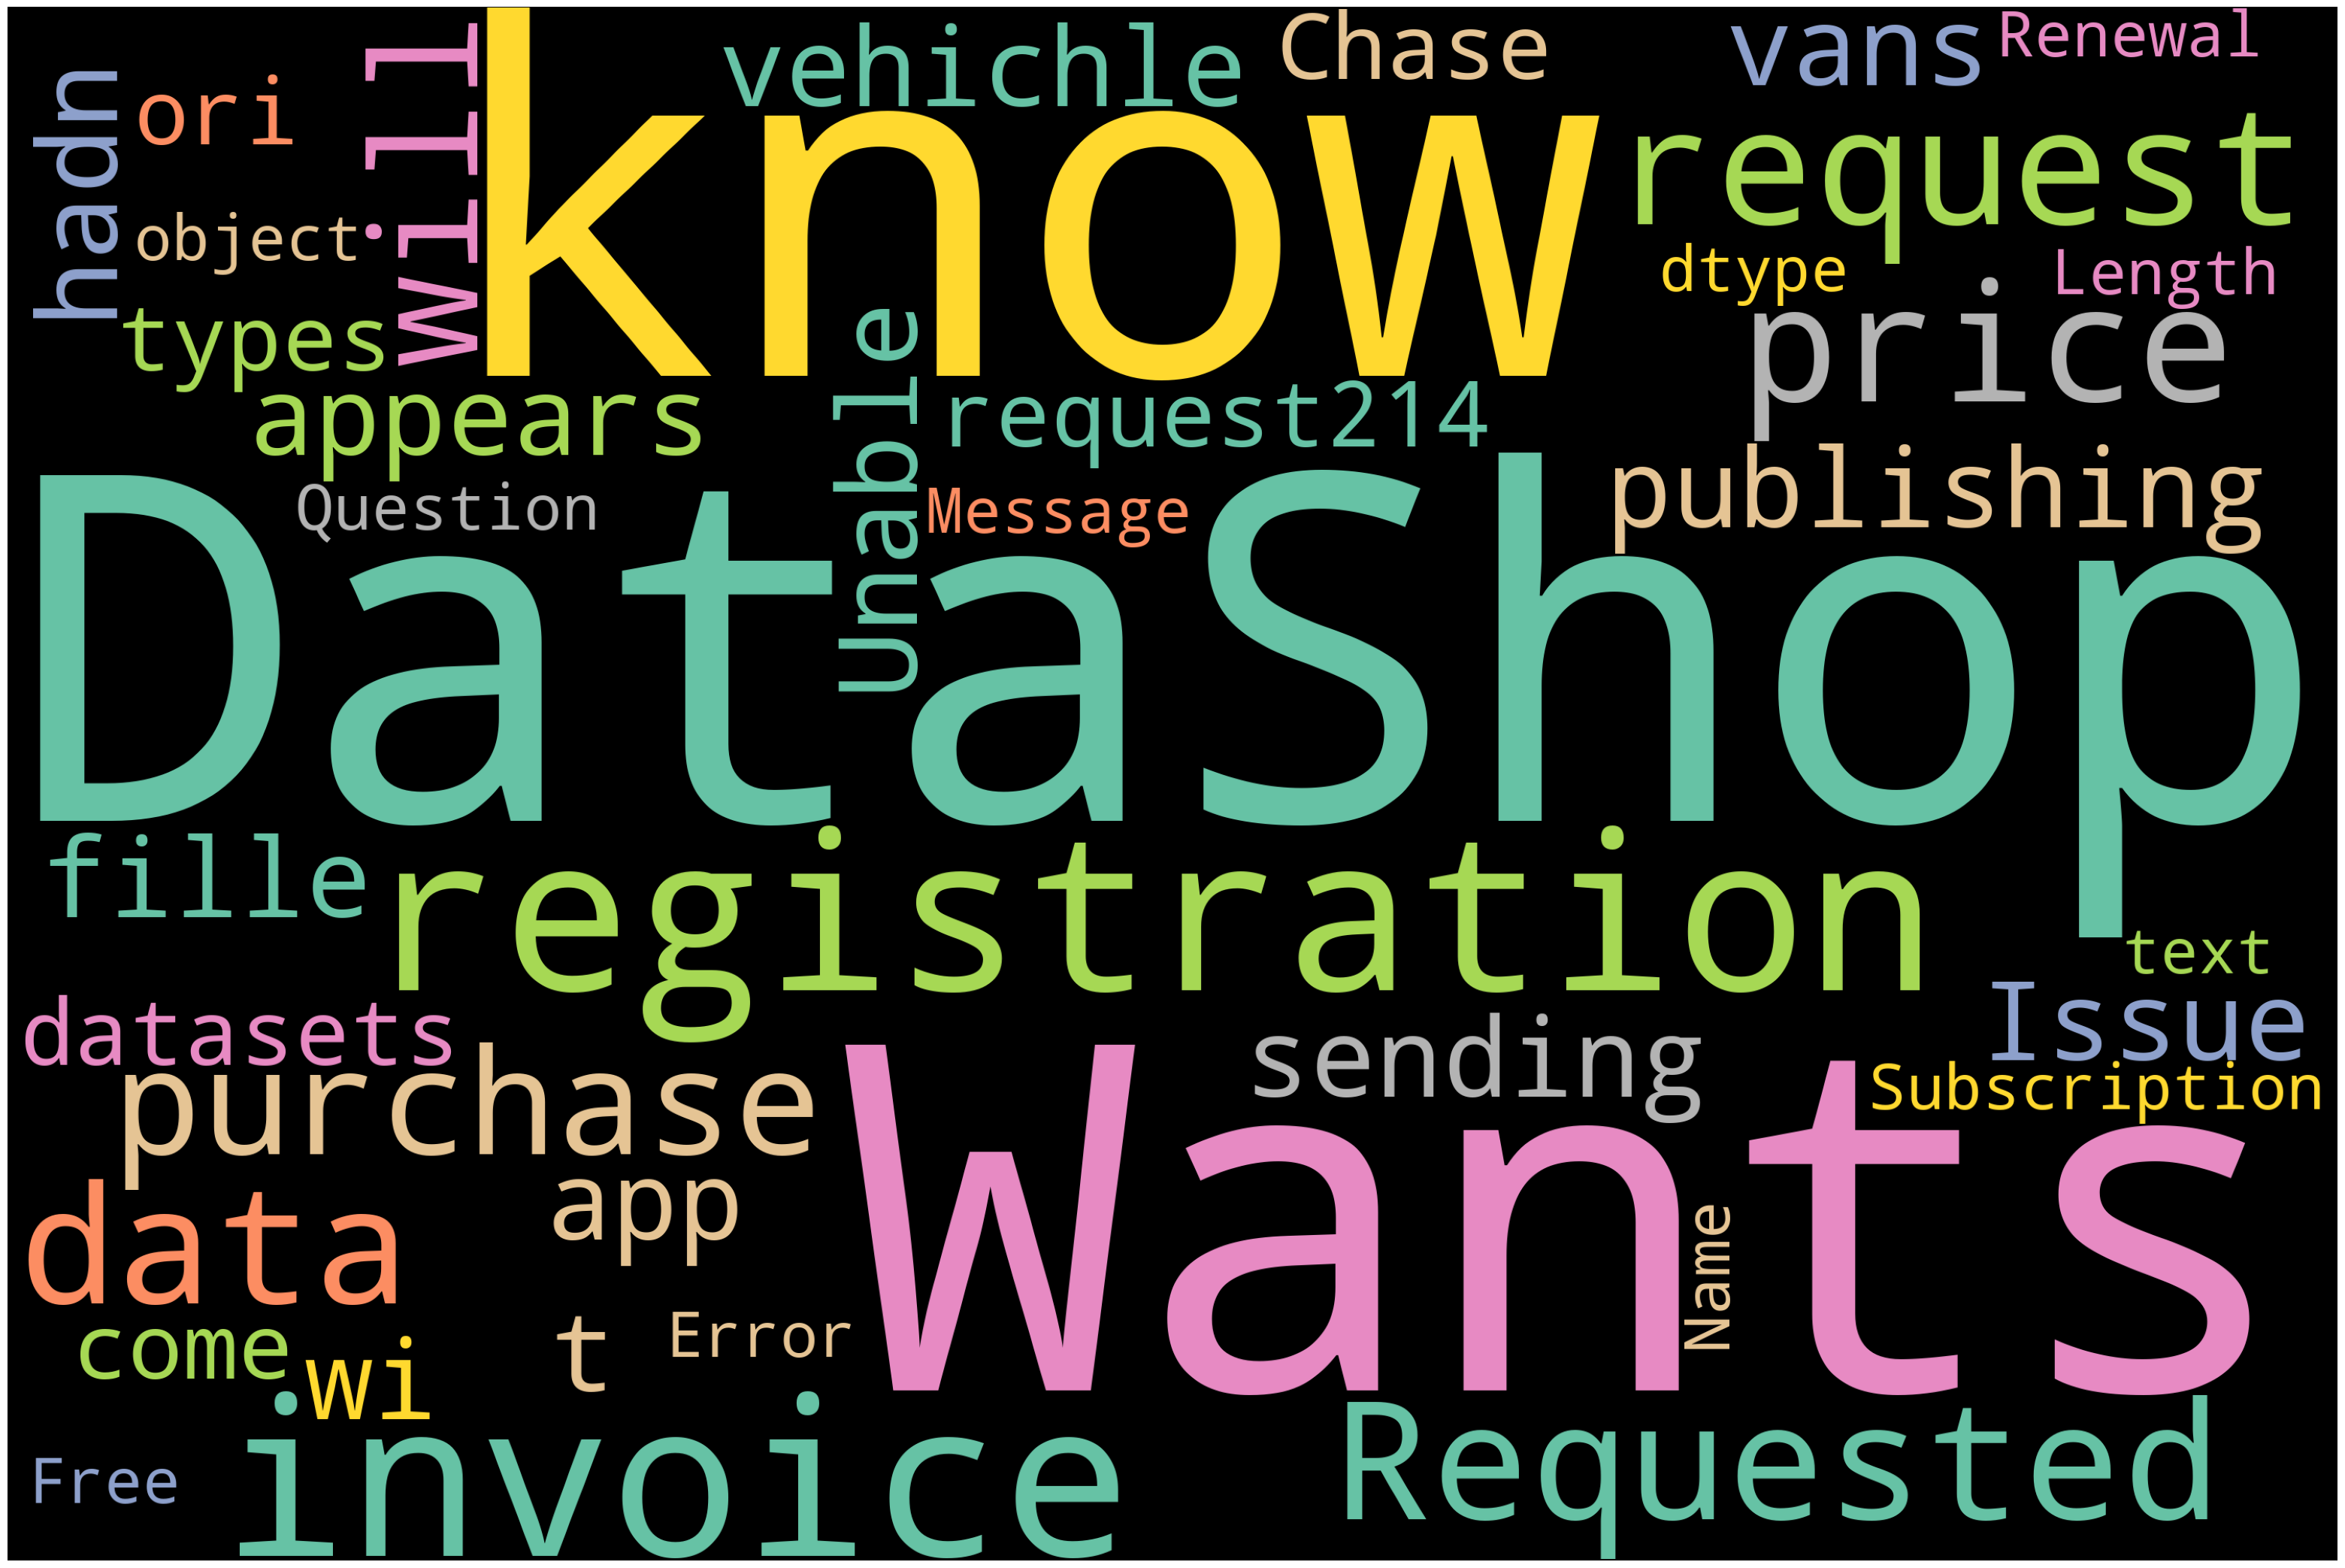

In [66]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text1)
# Save to a file
wordcloud.to_file('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_No_Solution.png')
# Plot
plot_cloud(wordcloud)

## Sentimental Analysis: 

In [67]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alvesd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
# Adding an row_id field to the dataframe, which will be useful for joining later:
#df["Email address"] = df.index + 1 #this code turn emails to index
#print (df.head(10))

In [69]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
#nltk.download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alvesd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alvesd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\alvesd\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\alvesd\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [70]:
#  This checks the number of rows and colummns:
print(df.shape)

(218, 18)


## Basic NLTK

In [71]:
# Check if the rows are clean:
example = df['Question/ requests (Free text)'][50]
print(example)

I would like to enquire about your EV vehicle and registration data sets and what would the cost be  What sort of level of granularity you provide for this metadata 


In [72]:
# Tokenizers divide strings into lists of substrings. 
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'would',
 'like',
 'to',
 'enquire',
 'about',
 'your',
 'EV',
 'vehicle',
 'and']

In [73]:
# Translate the text to a computable reading
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('enquire', 'VB'),
 ('about', 'IN'),
 ('your', 'PRP$'),
 ('EV', 'NNP'),
 ('vehicle', 'NN'),
 ('and', 'CC')]

In [74]:
# Classes and interfaces for identifying non-overlapping linguistic groups (such as base noun phrases) in unrestricted text.
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  I/PRP
  would/MD
  like/VB
  to/TO
  enquire/VB
  about/IN
  your/PRP$
  EV/NNP
  vehicle/NN
  and/CC
  registration/NN
  data/NNS
  sets/NNS
  and/CC
  what/WDT
  would/MD
  the/DT
  cost/NN
  be/VB
  What/WP
  sort/NN
  of/IN
  level/NN
  of/IN
  granularity/NN
  you/PRP
  provide/VBP
  for/IN
  this/DT
  metadata/NN)


# Step 1 - Use VADER: Valence Aware Dictionary and Sentiment Reasoner

In [75]:
# Importing library means bringing all of the functionality to your finger tips in your python script or jupyter notebook.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

#sia = SentimentIntensityAnalyzer()
sia = SIA()

In [76]:
# SentimentIntensityAnalyzer is a class. You need to initialize an object of SentimentIntensityAnalyzer and call the polarity_scores() method on that.
sia.polarity_scores('I love SMMT')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [77]:
# SentimentIntensityAnalyzer is a class. You need to initialize an object of SentimentIntensityAnalyzer and call the polarity_scores() method on that.
sia.polarity_scores('I dont like SMMT')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [78]:
# Check the results:
example

'I would like to enquire about your EV vehicle and registration data sets and what would the cost be  What sort of level of granularity you provide for this metadata '

In [79]:
# SentimentIntensityAnalyzer is a class. You need to initialize an object of SentimentIntensityAnalyzer and call the polarity_scores() method on that.
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.3612}

In [80]:
# Require that many non-NA values. Cannot be combined with how. subsetcolumn label or sequence of labels:
df1 = df.dropna(subset=['Question/ requests (Free text)'])

In [81]:
# Print the top rows: 
df1.head()

,Email address,Full name,Company/ Department,Date,Contact Method,SDI Contact responsible,Enquiry type,Question/ requests (Free text),Solution type,Solution (Free text),SDI contact date,DataSet,Data avaliable to help?,Data in DataShop?,Datashop account created,Received/ purchased reports,Purchase price,Who will receive data
1,Di.Wu@weissasset.com,Di Wu,Weiss Asset Management,2021-12-13 00:00:00,Email,Ops,Data,What is the source of Production data,Solution provided,Sarah responded,2021-12-13 00:00:00,Combination,No,No,Yes,NaN,NaN,NaN
2,Tricia.Stones@simonbailes.co.uk,Tricia Stones,Simon Bailes,2021-12-13 00:00:00,Email,NaN,MVRIS,29 12 21 Unable to fille out registration for...,Solution provided,4.1.22 JT asked which borwser and to spply scr...,2021-12-13 00:00:00,nan,NaN,NaN,No,No,NaN,NaN
3,kevin@mackiemotors.com,Kevin,Mackie Motors,2021-12-13 00:00:00,Email,NaN,DataShop,After sending the invoice it appears he hadn t...,DataShop email,Resloved by re-running the data. No price diff...,2021-12-13 00:00:00,nan,NaN,NaN,Yes,Yes,NaN,NaN
7,clester@rhomotion.com,Charles Lester,Rho Motion,2021-12-21 00:00:00,Email,James,Data,Requested publishing price so DataShop not app...,Manual Quote,4.1.2022. JT asked what they plan to do with d...,2021-12-23 00:00:00,New Reg - Car,Yes,Partly,Yes,Manual,NaN,NaN
8,gorin@arrival.com,Ed Gorin,Arrival,2022-01-06 00:00:00,Email,NaN,Data,requested to get registration data for vans wi...,DataShop email,NaN,2022-01-06 00:00:00,New Reg - LCV,Yes,Yes,Yes,No,NaN,NaN


In [82]:
# View the rows as a list and cleansed: 
list(df1['Question/ requests (Free text)'])

['What is the source of Production data ',
 '29 12 21  Unable to fille out registration form fields  ',
 'After sending the invoice it appears he hadn t selected to split by Postcode District  ',
 'Requested publishing price so DataShop not appropriate',
 'requested to get registration data for vans with body types ',
 'request to purchase vehichle data from 2005 ',
 'Request for Market Share  Registrations ',
 'Request for monthly data with Northern Ireland included ',
 'purchasing data from 2016   2021 but have some queries   Cars   HCV under 6 Tonnes  ',
 'We would like to get a quote to receive a monthly report of all new UK sales together of battery electric vehicles  split by model variant please ',
 'I am wondering if you have Total   of registrations of LCV and HGV and YOY growth on each segment then just MOM of new registrations ',
 'MotorParc data by Postcode   Model   Ownership   Make   Fuel Aggregated   Fuel   Total parc   Split by year  ',
 'request to get registrations da

In [83]:
# Run the polarity on the entire dataset
res = {}
for i,  row in tqdm(df1.iterrows(), total = len(df1)):
    text = row['Question/ requests (Free text)']
    myid = row['Email address']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/210 [00:00<?, ?it/s]

In [84]:
# Check the scores in a json format:
res

{'Di.Wu@weissasset.com': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Tricia.Stones@simonbailes.co.uk': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'kevin@mackiemotors.com': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'clester@rhomotion.com': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'gorin@arrival.com ': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'simon.gallagher@esmartnetworks.co.uk': {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'clare.smith@estartruckandvan.co.uk': {'neg': 0.0,
  'neu': 0.645,
  'pos': 0.355,
  'compound': 0.296},
 "joe.o'mahony@applegreenelectric.com>": {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0},
 'Thomas.Hughes@bp.com': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'nick@emissionsanalytics.com': {'neg': 0.0,
  'neu': 0.827,
  'pos': 0.173,
  'compound': 0.5859},
 'jbritton@paybyphone.com': {'neg': 0.0,
  'neu': 0.898,
  'pos': 0.102,
  'comp

In [85]:
# Turn j-son to dataframe and make the 'Email address' columns as index:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Email address'})
vaders.head()

,Email address,neg,neu,pos,compound
0,Di.Wu@weissasset.com,0.0,1.0,0.0,0.0
1,Tricia.Stones@simonbailes.co.uk,0.0,1.0,0.0,0.0
2,kevin@mackiemotors.com,0.0,1.0,0.0,0.0
3,clester@rhomotion.com,0.0,1.0,0.0,0.0
4,gorin@arrival.com,0.0,1.0,0.0,0.0


In [86]:
# Join the original dataset with the score table results above using the email as indexer:
vaders =  vaders.merge(df1, how='left')

In [87]:
# Now we have sentiment score and metadata
vaders.head()

,Email address,neg,neu,pos,compound,Full name,Company/ Department,Date,Contact Method,SDI Contact responsible,...,Solution type,Solution (Free text),SDI contact date,DataSet,Data avaliable to help?,Data in DataShop?,Datashop account created,Received/ purchased reports,Purchase price,Who will receive data
0,Di.Wu@weissasset.com,0.0,1.0,0.0,0.0,Di Wu,Weiss Asset Management,2021-12-13 00:00:00,Email,Ops,...,Solution provided,Sarah responded,2021-12-13 00:00:00,Combination,No,No,Yes,NaN,NaN,NaN
1,Tricia.Stones@simonbailes.co.uk,0.0,1.0,0.0,0.0,Tricia Stones,Simon Bailes,2021-12-13 00:00:00,Email,NaN,...,Solution provided,4.1.22 JT asked which borwser and to spply scr...,2021-12-13 00:00:00,nan,NaN,NaN,No,No,NaN,NaN
2,kevin@mackiemotors.com,0.0,1.0,0.0,0.0,Kevin,Mackie Motors,2021-12-13 00:00:00,Email,NaN,...,DataShop email,Resloved by re-running the data. No price diff...,2021-12-13 00:00:00,nan,NaN,NaN,Yes,Yes,NaN,NaN
3,clester@rhomotion.com,0.0,1.0,0.0,0.0,Charles Lester,Rho Motion,2021-12-21 00:00:00,Email,James,...,Manual Quote,4.1.2022. JT asked what they plan to do with d...,2021-12-23 00:00:00,New Reg - Car,Yes,Partly,Yes,Manual,NaN,NaN
4,gorin@arrival.com,0.0,1.0,0.0,0.0,Ed Gorin,Arrival,2022-01-06 00:00:00,Email,NaN,...,DataShop email,NaN,2022-01-06 00:00:00,New Reg - LCV,Yes,Yes,Yes,No,NaN,NaN


In [88]:
#  This checks the number of rows and colummns:
print(vaders.shape)

(210, 22)


## Plot Vader results

In [89]:
# Replace a single value with a new value for an individual DataFrame column:
vaders['Solution type'] = vaders['Solution type'].replace(['Solution provided'], '5')
vaders['Solution type'] = vaders['Solution type'].replace(['DataShop email'], '4')
vaders['Solution type'] = vaders['Solution type'].replace(['Manual Quote'], '3')
vaders['Solution type'] = vaders['Solution type'].replace(['General enquiry'], '2')
vaders['Solution type'] = vaders['Solution type'].replace(['No Solution'], '1')

## Plot "Solution type":

In [90]:
# Return a Series containing counts of unique values.
Received = df['Solution type'].value_counts(ascending=False)#[:10]
print(Received)

DataShop email              81
Solution provided           74
No Solution                 12
Manual Quote                 4
General enquiry              3
Provided data (internal)     2
Name: Solution type, dtype: int64


## Legend
## Solution provided = 5
## DataShop email = 4
## Manual Quote = 3
## General enquiry = 2
## No Solution = 1

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\741820786.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax, labels=labels,


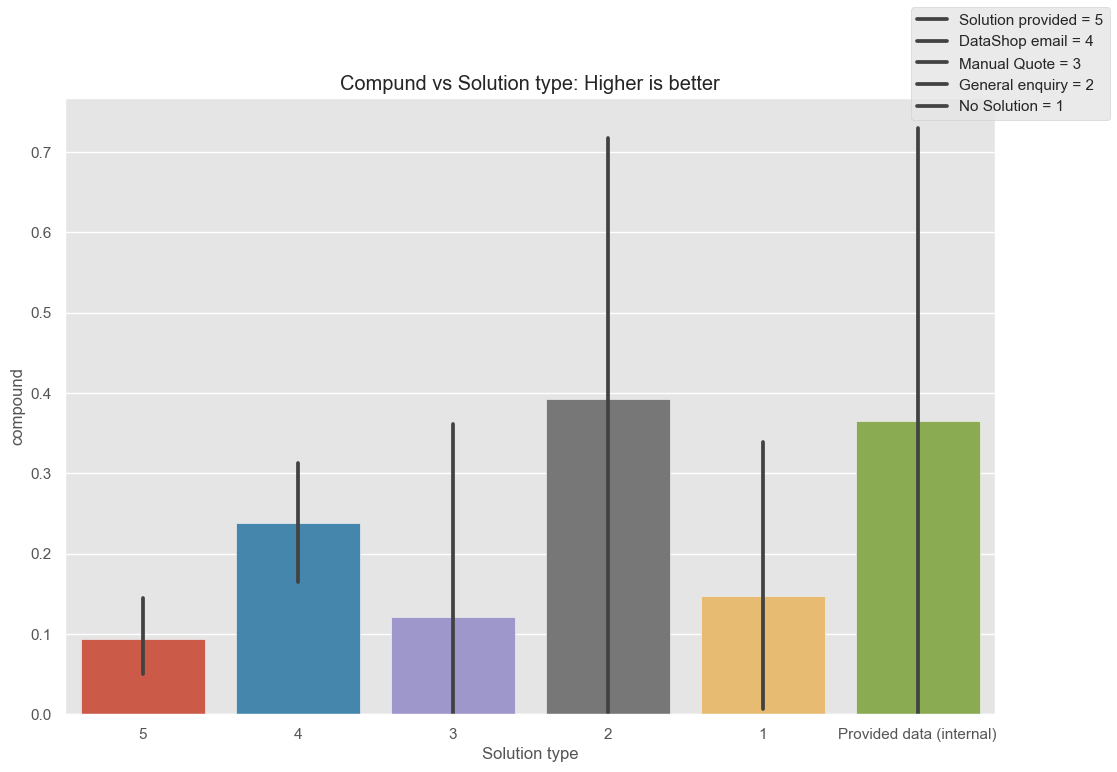

In [91]:
# Labels to use in the legend for each line
labels = ["Solution provided = 5", "DataShop email = 4", "Manual Quote = 3", "General enquiry = 2", "No Solution = 1"]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax = sns.barplot(data = vaders, x = 'Solution type', y = 'compound')
ax.set_title('Compund vs Solution type: Higher is better')

fig.legend(ax, labels=labels,
           loc="upper right")
plt.show()

## Insert Chart Into Excel

In [92]:
sht.pictures.add(
fig, 
name="Matploitlib8", 
left = sht.range("AA3").left,
top = sht.range("AA3").top, 
height = 400, 
width = 500,
)

<Picture 'Matploitlib8' in <Sheet [Forms Charts.xlsx]Log Forms Dashboard>>

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\2236260528.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([axs[0], axs[1], axs[2]], labels=labels,


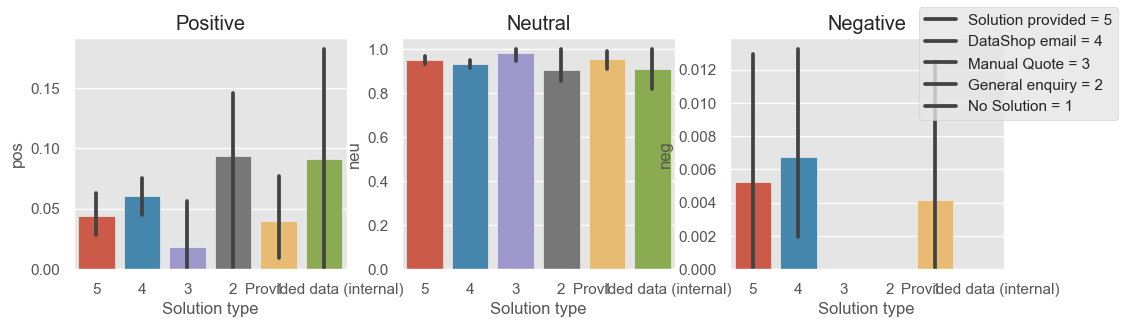

In [93]:
# Labels to use in the legend for each line
labels = ["Solution provided = 5", "DataShop email = 4", "Manual Quote = 3", "General enquiry = 2", "No Solution = 1"]

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data = vaders, x = 'Solution type', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Solution type', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'Solution type', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
fig.legend([axs[0], axs[1], axs[2]], labels=labels,
           loc="upper right")
#plt.xticks(rotation=45)
plt.show()

## Insert Chart Into Excel

In [94]:
sht1.pictures.add(
fig, 
name="Matploitlib9", 
left = sht.range("U3").left,
top = sht.range("U3").top, 
height = 400, 
width = 1200,
)

<Picture 'Matploitlib9' in <Sheet [Forms Charts.xlsx]NLP>>

In [95]:
# Count the negative scores: 
# Return a Series containing counts of unique values.
neg = vaders['neg'].value_counts(ascending=False)#[:10]
print(neg)

0.000    196
0.050      3
0.064      1
0.053      1
0.048      1
0.049      1
0.043      1
0.176      1
0.115      1
0.135      1
0.028      1
0.231      1
0.205      1
Name: neg, dtype: int64


## Save, Resize and Close the file

In [96]:
# Resize and save the picture:
from PIL import Image
import xlsxwriter
import os

with Image.open("F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_Yes_No_Solution.png") as img:
    width_100 = img.width
    height_100 = img.height

width_30 = int(round(width_100 * 0.2, 0))
img = Image.open('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_Yes_No_Solution.png')
wpercent = (width_30/float(width_100))
hsize = int((float(height_100)*float(wpercent)))
img = img.resize((width_30,hsize), Image.ANTIALIAS)
img.save('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_Yes_No_Solution_30.png') 

#workbook = xlsxwriter.Workbook('C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\test\\Natural Languange Processing.xlsx')
#worksheet = workbook.add_worksheet()
#worksheet.set_column('A:B', 10)
#worksheet.set_row(1, 70)
#worksheet.hide_gridlines()
#worksheet.write('A2', 'Most common words in the "Question/ requests (Free text)" column:')
#worksheet.insert_image('B2', 'F:\\AIS\\Diego_F_Drive_Data\\Jupyter_Note_Book\\images\\NLP30.png')

#workbook.close()

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\1488174369.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((width_30,hsize), Image.ANTIALIAS)


In [97]:
# Resize and save the picture:
from PIL import Image
import xlsxwriter
import os

with Image.open("F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_No_Solution.png") as img:
    width_100 = img.width
    height_100 = img.height

width_30 = int(round(width_100 * 0.2, 0))
img = Image.open('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_No_Solution.png')
wpercent = (width_30/float(width_100))
hsize = int((float(height_100)*float(wpercent)))
img = img.resize((width_30,hsize), Image.ANTIALIAS)
img.save('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_No_Solution_30.png') 

C:\Users\alvesd\AppData\Local\Temp\ipykernel_14288\2774903959.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((width_30,hsize), Image.ANTIALIAS)


In [98]:
wb.save()

In [99]:
wb.close()

In [100]:
import win32com.client as win32

In [101]:
excel = win32.gencache.EnsureDispatch('Excel.Application')

In [102]:
excel.Quit()

In [103]:
del excel # this line removed it from task manager in my case

## Add NLP resutls to Forms Charts: NLP_Yes_No_Solution_30 image

In [104]:
# Import the library
import openpyxl
from openpyxl import load_workbook
from openpyxl import Workbook
from openpyxl.drawing.image import Image
#from openpyxl.utils import coordinate_from_string
from openpyxl.utils.cell import get_column_letter

In [105]:
# Get the latestes openyxl version 
openpyxl_version = openpyxl.__version__
print(openpyxl_version)  #to see what version I'm running

3.0.10


In [106]:
# Load NLP image
png_loc = 'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_Yes_No_Solution_30.png'

In [107]:
#Save it to a NLP sheet:
wb = load_workbook('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx')
ws = wb.active
my_png = openpyxl.drawing.image.Image(png_loc)
ws.add_image(my_png, 'B4')
wb.save('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx')

## Add NLP resutls to Forms Charts: NLP_No_Solution_30 image

In [108]:
# Load NLP image
png_loc1 = 'F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\NLP_No_Solution_30.png'

In [109]:
#Save it to a NLP sheet:
wb1 = load_workbook('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx')
ws = wb1.active
my_png = openpyxl.drawing.image.Image(png_loc1)
ws.add_image(my_png, 'B31')
wb1.save('F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx')

In [110]:
wb1.close()

In [111]:
import win32com.client as win32

In [112]:
excel = win32.gencache.EnsureDispatch('Excel.Application')

In [113]:
excel.Quit()

In [114]:
del excel # this line removed it from task manager in my case

In [115]:
import shutil
src_path = r"F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Dashboard\\Forms Charts.xlsx"
dst_path = r"F:\\AIS\\Enquiries and Pricing\\Enquiries Log - 2023\\Forms Charts.xlsx"
shutil.copy(src_path, dst_path)
print('Copied')

Copied


In [116]:
import win32com.client as win32

In [117]:
excel = win32.gencache.EnsureDispatch('Excel.Application')

In [118]:
excel.Quit()

In [119]:
del excel # this line removed it from task manager in my case